In [11]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [12]:
# Generate and dataset for Logistic Regression
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

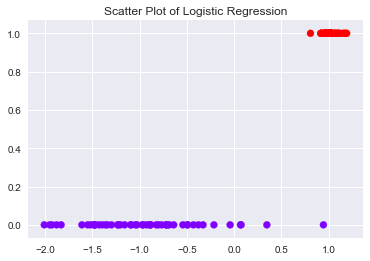

In [27]:
# Create a scatter plot
plt.scatter(x, y, c=y, cmap='rainbow')
plt.title('Scatter Plot of Logistic Regression')
plt.show()

In [14]:
# Split the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [15]:
# Create a Logistic Regression Object, perform Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
# Show to Coeficient and Intercept
print(lr.coef_)
print(lr.intercept_)

[[2.95178072]]
[-0.42138716]


In [18]:
# Perform prediction using the test dataset
y_pred = lr.predict(x_test)

In [19]:
# Show the Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[13,  1],
       [ 0, 11]], dtype=int64)

In [ ]:
# True positive: (top-left) (We predicted a positive result and it was positive)
# True negative: (lower-right) (We predicted a negative result and it was negative)
# False positive:(top-right) (We predicted a positive result and it was negative)
# False negative: (lower-left) (We predicted a negative result and it was positive)

In [21]:
# Check the actual probability that a data point belongs to a class
lr.predict_proba(x_test)

array([[0.9746387 , 0.0253613 ],
       [0.9876133 , 0.0123867 ],
       [0.04498603, 0.95501397],
       [0.05611359, 0.94388641],
       [0.5507404 , 0.4492596 ],
       [0.99437364, 0.00562636],
       [0.0778752 , 0.9221248 ],
       [0.80084379, 0.19915621],
       [0.74124053, 0.25875947],
       [0.98597775, 0.01402225],
       [0.08369847, 0.91630153],
       [0.06727726, 0.93272274],
       [0.92015314, 0.07984686],
       [0.07206243, 0.92793757],
       [0.84459607, 0.15540393],
       [0.0811066 , 0.9188934 ],
       [0.99327132, 0.00672868],
       [0.96401216, 0.03598784],
       [0.08023779, 0.91976221],
       [0.98949938, 0.01050062],
       [0.07375613, 0.92624387],
       [0.06828598, 0.93171402],
       [0.07283834, 0.92716166],
       [0.35406935, 0.64593065],
       [0.96943771, 0.03056229]])

In [22]:
# The first column corresponds to the probability that the sample belongs to the first class 
# The second column corresponds to the probability that the sample belongs to the second class.

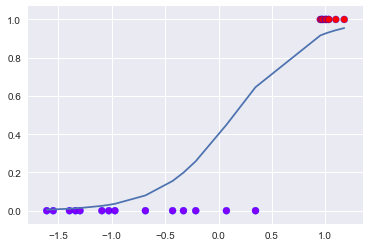

In [25]:
# Create and sort a dataframe containing our data
df = pd.DataFrame({'x': x_test[:,0], 'y': y_test})
df = df.sort_values(by='x')


# The expit function, also known as the logistic function, is defined as expit(x) = 1/(1+exp(-x)).
# It is the inverse of the logit function.
from scipy.special import expit
sigmoid_function = expit(df['x'] * lr.coef_[0][0] + lr.intercept_[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')
plt.show()